# Implementation of Saade spectral clustering with Bethe Hessian Method

Pipeline: <br>
1. Input distance matrix in Python. Save as a 3-column text file (first index, second index, value)
2. Read into MATLAB using spconvert(D)
3. Run Saade's spectral clustering method

In [21]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.sparse
from sklearn import manifold

# This function takes in a distance matrix, thresholds it, and saves it as a sparse matlab laplacian
# (to be used with Saade's matlab code)
def python_dist_to_matlab_adj(D,q,dirname):
    N = int(np.shape(D)[0]) 
    A = np.copy(dist)
    thresh = np.percentile(dist,q)
    A[dist  > thresh] = 0
    A[dist <= thresh] = 1
    A = A - np.identity(N)
    A = scipy.sparse.csr_matrix(A)
    rows,cols = A.nonzero()
    g = open(dirname+'subname.txt','w')
    print >> g, str(q)
    f = open(dirname+'/adj_'+str(q)+'.txt','w')
    for i in range(len(rows)):
        print >> f, str(rows[i]+1)+'\t'+str(cols[i]+1)+'\t1'
    
# obtain two major directions from t-SNE
def tSNE_pairwise(D):
    tsne = manifold.TSNE(n_components=2, random_state=0, metric='precomputed', n_iter=2000);
    X_tsne = tsne.fit_transform(D);
    return X_tsne

# Plot function with colors corresponding to labels (first two columns of X)
def jz_plot(X,labels):
    unique_labels = np.unique(labels)
    plt.figure(figsize=(15,10))
    for label in unique_labels:
        ind = np.squeeze(labels == label)
        plt.scatter(X[ind,0],X[ind,1],c=np.random.rand(3))    

# Hist of matrix (to gauge values in matrix)
def hist_matrix(X,nbins=10):
    plt.figure(figsize=(10,6))
    plt.hist(np.asarray(X).reshape(-1),nbins)
    plt.show()

# Inputs:
#  D: distance matrix (higher value = less similarity)
#  q: quantile (between 0 and 1) to threshold distance matrix
def jz_bethe_hessian_spectral(dist,q=50):
    N = int(np.shape(D)[0]) 
    A = np.copy(dist)
    thresh = np.percentile(dist,q)
    A[dist  > thresh] = 0
    A[dist <= thresh] = 1
    A = A - np.identity(N)
    D = np.diag(np.sum(A))
    c = np.mean(np.sum(D)) # Average degree of the graph, as described in paper
    r = np.sqrt(c)
    L = (r**2-1)*np.identity(N)-r*A-D

In [3]:
# Test on Zeisel
with open('/data/SS_RNA_seq/Code/pairwise_jensen_shannon_divergence.dat', 'rb') as infile:
    dist = pickle.load(infile)
X_tsne = tSNE_pairwise(dist)

In [22]:
# Save adjacency matrix
q = 0.2
dirname = '/data/SS_RNA_seq/Code/clustering_on_reads/Sparse_Distance_Matrices_For_MATLAB/'
python_dist_to_matlab_adj(dist,q,dirname)

# Run matlab script now (Saade's implementation of spectral clustering with bethe hessian)

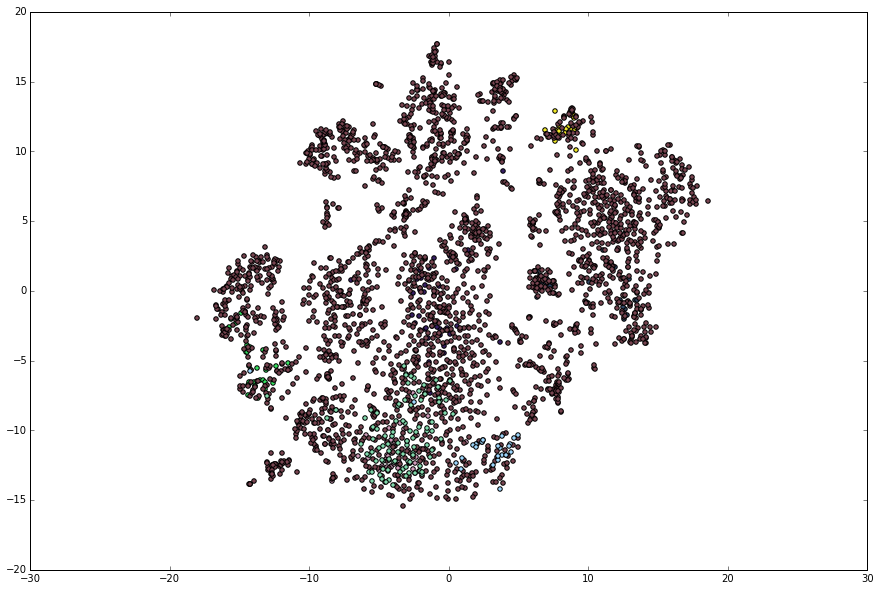

In [30]:
%matplotlib inline
# Read in produced labels, plot
labels = np.loadtxt(dirname+'labels_'+str(q)+'.txt')

jz_plot(X_tsne,labels)

In [29]:
for i in range(1,9):
    print np.sum(labels == i)

30
38
31
40
30
2714
98
24
